# Sample Code to Run Zheng-Klein Estimator.

In [27]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
import numpy as np
import random

seed = 0
random.seed(seed)
np.random.seed(seed)

# Load Data

In [29]:
# Prerequisite: pip install SurvSet
from SurvSet.data import SurvLoader

dataset_name = "flchain"
loader = SurvLoader()
df, _ = loader.load_dataset(ds_name=dataset_name).values()
print(df)

       pid  event  time  num_age  num_kappa  num_lambda  num_flc_grp  \
0        0      1    85       97      5.700       4.860           10   
1        1      1  1281       92      0.870       0.683            1   
2        2      1    69       94      4.360       3.850           10   
3        3      1   115       92      2.420       2.220            9   
4        4      1  1039       93      1.320       1.690            6   
...    ...    ...   ...      ...        ...         ...          ...   
7869  7869      0  4997       52      1.210       1.610            6   
7870  7870      0  3652       52      0.858       0.581            1   
7871  7871      0  2507       54      1.700       1.720            8   
7872  7872      0  4982       53      1.710       2.690            9   
7873  7873      0  3995       50      1.190       1.250            4   

      num_creatinine  num_sample_yr fac_sex  fac_chapter fac_sample_yr  \
0                1.7           1997       F  Circulatory     

# Run Zheng-Klein Estimator

In [30]:
import cenreg.model.nonparametric
from cenreg.model.copula_np import FrankCopula, IndependenceCopula

copula_ub = FrankCopula(5.0)
copula_lb = FrankCopula(-5.0)
copula_ind = IndependenceCopula()
ecdf_ub = cenreg.model.nonparametric.zheng_klein_estimator(df["time"].values, df["event"].values, copula_ub)
ecdf_lb = cenreg.model.nonparametric.zheng_klein_estimator(df["time"].values, df["event"].values, copula_lb)
ecdf_ind = cenreg.model.nonparametric.zheng_klein_estimator(df["time"].values, df["event"].values, copula_ind)

# Plot Zheng-Klein Curve

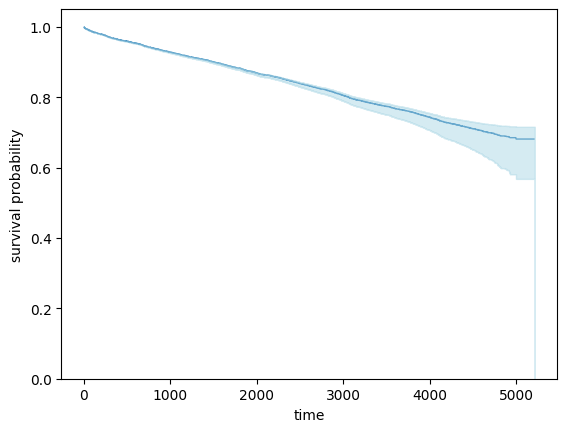

In [31]:
%matplotlib inline

import matplotlib.pyplot as plt

fig = plt.figure()
plt.xlabel('time')
plt.ylabel('survival probability')
plt.ylim([0.0,1.05])
x = ecdf_ind.bins
y_ind = 1.0 - ecdf_ind.cdf(x[:-1])
y_lb = 1.0 - ecdf_ub.cdf(x)
y_ub = 1.0 - ecdf_lb.cdf(x)
plt.stairs(y_ind, x, baseline=None)
plt.fill_between(x, y_lb, y_ub, step='post', color='lightblue', alpha=0.5)
plt.show()